In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [40]:
X = pd.read_csv('./X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [42]:
model = DecisionTreeRegressor(max_depth=2)

In [43]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
import graphviz
from sklearn.tree import export_graphviz

In [45]:
treedot = export_graphviz(model, out_file = None, feature_names = X.columns)

In [46]:
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="opening_gross <= 41613376.0\\nmse = 4.491994363696598e+16\\nsamples = 1665\\nvalue = 141540319.054"] ;\n1 [label="opening_gross <= 22074047.0\\nmse = 1.3333822193127832e+16\\nsamples = 1506\\nvalue = 92999937.199"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 4923666241203544.0\\nsamples = 1257\\nvalue = 64781848.271"] ;\n1 -> 2 ;\n3 [label="mse = 3.147813101998767e+16\\nsamples = 249\\nvalue = 235450289.735"] ;\n1 -> 3 ;\n4 [label="opening_gross <= 70351576.0\\nmse = 1.1039811871593587e+17\\nsamples = 159\\nvalue = 601300162.289"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 4.067538845924512e+16\\nsamples = 92\\nvalue = 440868287.554"] ;\n4 -> 5 ;\n6 [label="mse = 1.2226485798747571e+17\\nsamples = 67\\nvalue = 821594676.851"] ;\n4 -> 6 ;\n}'

Parecida busqueda exhaustiva

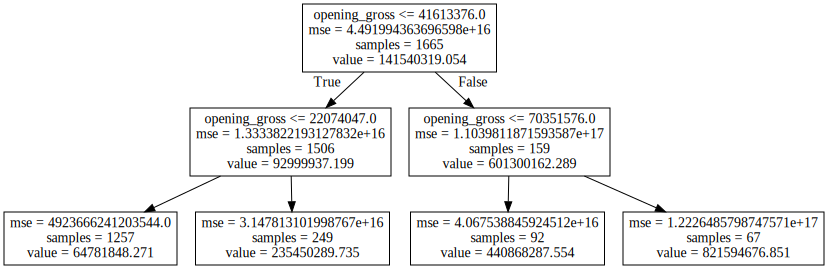

In [47]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/release/bin'
graphviz.Source(treedot)

# Rando Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection  import cross_validate

In [49]:
#n cantidades de arboles
n = 200
forest = RandomForestRegressor(n)
result = cross_validate(forest, X, y, cv=5, scoring='r2',return_train_score=True)

In [50]:
result

{'fit_time': array([4.65210533, 5.22200131, 5.92620468, 5.90690565, 5.58695149]),
 'score_time': array([0.05318856, 0.0838213 , 0.09268618, 0.09652019, 0.11088109]),
 'test_score': array([0.47907205, 0.70029721, 0.5689226 , 0.38481382, 0.45041876]),
 'train_score': array([0.96217982, 0.96898479, 0.967597  , 0.9668051 , 0.96471813])}

Posiblemente overfitin

In [51]:
test_scores = result['test_score']
train_scores = result['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores ))

0.966056966377552
0.516704889264308


# Gradient Boosted Trees

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

Posiblemente overfitin

In [53]:
ensemble = GradientBoostingRegressor()
result = cross_validate(ensemble, X, y, cv=5, scoring='r2',return_train_score=True)

In [54]:
test_scores = result['test_score']
train_scores = result['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores ))

0.9151392143549633
0.5238960831188457


# Grid Search

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [72]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_test1 = {'n_estimators':range(20,501,20)}


In [85]:
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

Gradient Boosting Son dificiles de optimizar 

- train_test_split se usa para evaluaciones rápidas, testeos y prototipaje.
- cross_validate es un método más robusto para poder estimar el rendimiento de tu algoritmo

Receta
- Elije un elening rate aprozimado a 0.1
- Despues fija los parametros del arbol
- Fija los parametros que son buenos para el arbol
- Con gridsearch busca el mejor valor para la cantidad de estimadores

In [86]:
estimador = GradientBoostingRegressor(learning_rate=0.1, 
                                       min_samples_split=500,
                                       min_samples_leaf=50,
                                       max_depth=8,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10)


In [87]:
gsearch1 = GridSearchCV(estimador, 
                        param_grid = param_test1, 
                        scoring='r2', 
                        cv=5,return_train_score = True)

In [88]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

In [89]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.07700987, 0.12778535, 0.19401522, 0.25467701, 0.32185197,
         0.38621316, 0.45322385, 0.51854768, 0.57046652, 0.63299079,
         0.71297984, 0.76464787, 0.82248726, 0.89952393, 0.99599829,
         1.03003368, 1.13449383, 1.20313649, 1.35496712, 1.35635476,
         1.38985243, 1.42751441, 1.48945961, 1.58014946, 1.65815272]),
  'std_fit_time': array([0.03332391, 0.00784522, 0.007517  , 0.0052606 , 0.01433603,
         0.01323376, 0.01574153, 0.01890407, 0.01910979, 0.01898052,
         0.01402921, 0.01670853, 0.01872674, 0.0096594 , 0.04969966,
         0.01101063, 0.05262618, 0.06379304, 0.19918587, 0.06794233,
         0.01840914, 0.02552362, 0.01994367, 0.03378933, 0.04795652]),
  'mean_score_time': array([0.0062499 , 0.00625167, 0.00100083, 0.0044023 , 0.00320067,
         0.00612693, 0.00735421, 0.00552855, 0.00692501, 0.00905104,
         0.00760584, 0.0049274 , 0.0080492 , 0.00762839, 0.00884304,
         0.0047286 , 0.0067246 , 0.0107677 , 0.

In [91]:
gsearch1.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=240,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [99]:
final_results = cross_validate(gsearch1.best_estimator_,X_train,y_train,return_train_score = True)

In [100]:
test_scores = final_results['test_score']
train_scores = final_results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores ))

0.8286608694466742
0.7553059694284988


In [101]:
estimador = GradientBoostingRegressor(learning_rate=0.1, 
                                       min_samples_split=500,
                                       min_samples_leaf=50,
                                       max_depth=8,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10,
                                     n_estimators=240)

In [102]:
estimador.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=240,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [104]:
estimador.score(X_test,y_test)

0.8092888852563106